In [1]:
import os

import pandas as pd

from utils.plot import *

from ESG.config import TEST_DATA_DIR, FIGURE_DIR

In [2]:
new_score_df = pd.read_csv(os.path.join(TEST_DATA_DIR, 'scores_new.csv'), dtype={'STOCK_CODE': str})
new_score_df['STOCK_CODE'] = new_score_df['STOCK_CODE'].apply(lambda x: '0' * (6-len(x)) + x)
new_score_df = new_score_df.sort_values(by=['STOCK_CODE']).reset_index(drop=True)

In [3]:
zz_800_df = pd.read_csv(os.path.join(r"D:\QuantData\指数", '指数收盘价（18-20）.csv'), parse_dates=['DATETIME']).iloc[:, [0, 2]]
zz_800_close = pd.read_csv(os.path.join(r"D:\QuantData\中证800成分股", '中证800股收盘价（2018-2020）.csv'))
zz_800_fs = pd.read_csv(os.path.join(r"D:\QuantData\中证800成分股", '中证800股自由流通市值（2018-2020）.csv'))
zz_800_ind = pd.read_csv(os.path.join(r"D:\QuantData\中证800成分股", '中证800股行业.csv'))

new_score_df['STOCK_CODE'] = zz_800_close['STOCK_CODE'].copy()
dates = pd.to_datetime(zz_800_df['DATETIME'])

In [4]:
factor_scores = zz_800_close[['STOCK_CODE']].copy()

for d in dates:
    factor_scores.loc[:, d._date_repr] = new_score_df.loc[:, 'ESG_SCORE_'+str(d.year-1)].values

C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


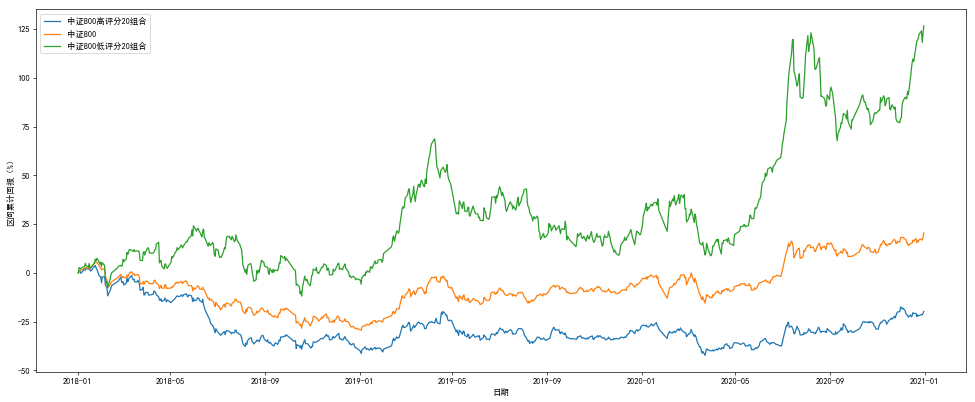

In [5]:
from factor.test import weighted_top_factor_return_rate

plt.figure(figsize=(20, 8), dpi=60)
weighted_top_factor_return_rate(factor_scores, zz_800_fs, zz_800_close, zz_800_df, mname='中证800')
plt.savefig(os.path.join(FIGURE_DIR, "中证800ESG投资组合累计收益.png"))

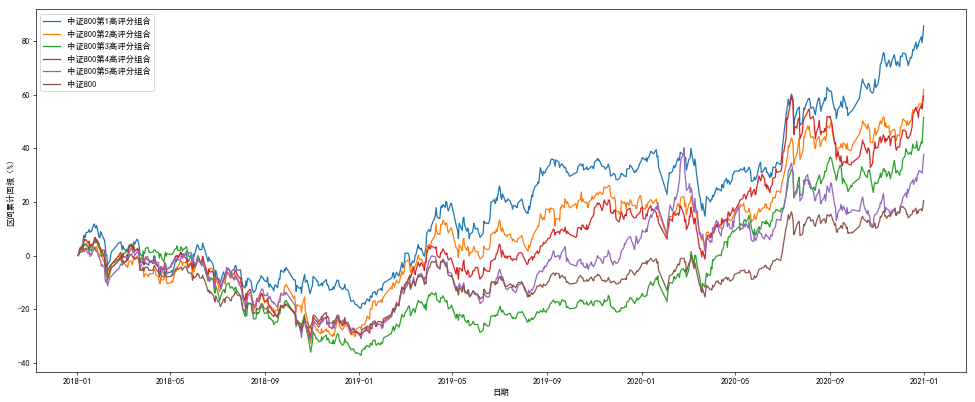

In [6]:
from factor.test import weighted_ind_neutral_bins_return_rate

plt.figure(figsize=(20, 8), dpi=60)
weighted_ind_neutral_bins_return_rate(factor_scores, zz_800_ind, zz_800_fs, zz_800_close, zz_800_df, mname='中证800')
plt.savefig(os.path.join(FIGURE_DIR, "中证800行业中性ESG投资组合累计收益.png"))

In [7]:
new_sz_score_df = pd.read_csv(os.path.join(TEST_DATA_DIR, 'scores_new_300.csv'), dtype={'STOCK_CODE': str})
new_sz_score_df['STOCK_CODE'] = new_sz_score_df['STOCK_CODE'].apply(lambda x: '0' * (6-len(x)) + x)
new_sz_score_df = new_sz_score_df.sort_values(by=['STOCK_CODE']).reset_index(drop=True)

In [8]:
mask = (zz_800_close['STOCK_CODE'].apply(lambda x: x.split('.')[0] in new_sz_score_df['STOCK_CODE'].values))
sz_300_df = pd.read_csv(os.path.join(r"D:\QuantData\指数", '指数收盘价（18-20）.csv'), parse_dates=['DATETIME']).iloc[:, [0, 1]]
sz_300_close = zz_800_close.loc[mask, :].copy().reset_index(drop=True)
sz_300_ind = zz_800_ind.loc[mask, :].copy().reset_index(drop=True)

new_sz_score_df['STOCK_CODE'] = sz_300_close['STOCK_CODE'].copy()
dates = pd.to_datetime(sz_300_df['DATETIME'])

In [9]:
# sz_300_weight = pd.read_csv(os.path.join(r"D:\QuantData\指数", '300_weight.csv'))
# sz_300_weight_ = pd.DataFrame([x[0].split('\t') for x in sz_300_weight.values],
#                               columns=sz_300_weight.columns[0].split('\t'))
# sz_300_weight_['TRADE_DT'] = pd.to_datetime(sz_300_weight_['TRADE_DT'])
# sz_300_weight_.to_csv(os.path.join(r"D:\QuantData\指数", '沪深300指数权重（18-20）.csv'), index=False, encoding='utf_8_sig')

In [10]:
sz_300_weight_ = pd.read_csv(os.path.join(r"D:\QuantData\指数", '沪深300指数权重（18-20）.csv'), parse_dates=['TRADE_DT'])

In [11]:
factor_scores = sz_300_close[['STOCK_CODE']].copy()
        
for d in dates:
    factor_scores.loc[:, d._date_repr] = new_sz_score_df.loc[:, 'ESG_SCORE_'+str(d.year-1)].values

In [16]:
sz_300_weight = sz_300_close[['STOCK_CODE']].copy()

def fetch_data(sc, dates):
    df = sz_300_weight_.loc[sz_300_weight_['STOCK_CODE']==sc, :]
    dat = list()
    cur = 0
    
    for d in dates:
        if d < df['TRADE_DT'].values[cur]:
            dat.append(float('nan'))
        else:
            if d >= df['TRADE_DT'].values[cur + 1]:
                cur += 1
            dat.append(df['I_WEIGHT'].values[cur])
    return dat

for sc in sz_300_weight['STOCK_CODE'].values:
    sz_300_weight.loc[sz_300_weight['STOCK_CODE']==sc, dates] = fetch_data(sc, dates)
    

C:\PycharmProjects\Quant\factor\test\naive_test.py:48: RuntimeWarning: invalid value encountered in greater
  mask = (weights[:, date + 1] > 0)
C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


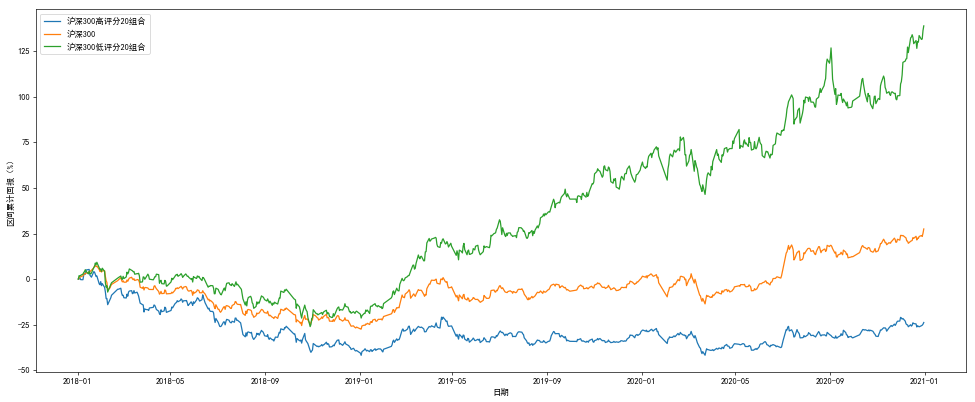

In [17]:
from factor.test import weighted_top_factor_return_rate

plt.figure(figsize=(20, 8), dpi=60)
weighted_top_factor_return_rate(factor_scores, sz_300_weight, sz_300_close, sz_300_df, mname='沪深300')
plt.savefig(os.path.join(FIGURE_DIR, "沪深300ESG投资组合累计收益.png"))

C:\PycharmProjects\Quant\factor\test\naive_test.py:112: RuntimeWarning: invalid value encountered in greater
  mask = (weights[:, date + 1] > 0)


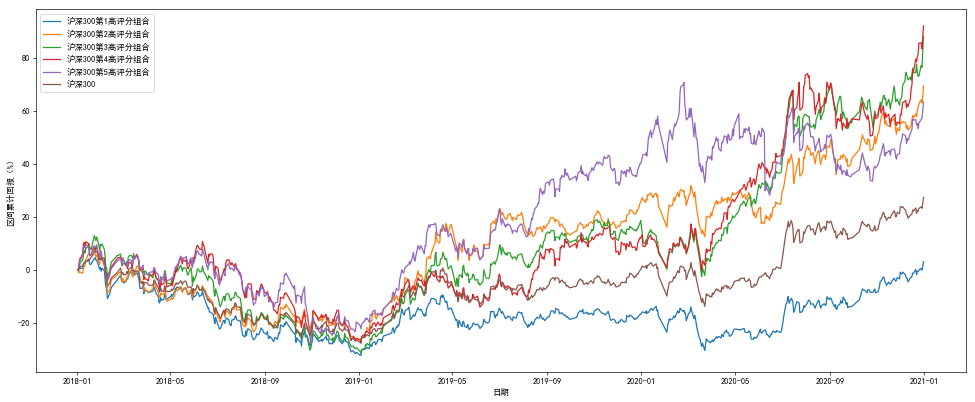

In [18]:
from factor.test import weighted_ind_neutral_bins_return_rate

plt.figure(figsize=(20, 8), dpi=60)
weighted_ind_neutral_bins_return_rate(factor_scores, sz_300_ind, sz_300_weight, sz_300_close, sz_300_df, mname='沪深300')
plt.savefig(os.path.join(FIGURE_DIR, "沪深300行业中性ESG投资组合累计收益.png"))

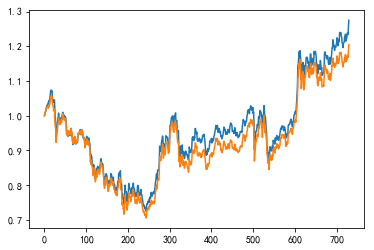

In [19]:
plt.plot(sz_300_df.iloc[:, 1].values / sz_300_df.iloc[:, 1].values[0])
plt.plot(zz_800_df.iloc[:, 1].values / zz_800_df.iloc[:, 1].values[0])